In [1]:
library(tidyverse)
library(readr)
library(ggridges)
library(ggdark)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'readr' was built under R version 4.0.5"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'ggridges' was built under R version 4.0.5"
Warning message:
"package 'ggdark' was built under R version 4.0.5"


In [2]:
survey <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-18/survey.csv')


-- Column specification --------------------------------------------------------
cols(
  timestamp = col_character(),
  how_old_are_you = col_character(),
  industry = col_character(),
  job_title = col_character(),
  additional_context_on_job_title = col_character(),
  annual_salary = col_double(),
  other_monetary_comp = col_character(),
  currency = col_character(),
  currency_other = col_character(),
  additional_context_on_income = col_character(),
  country = col_character(),
  state = col_character(),
  city = col_character(),
  overall_years_of_professional_experience = col_character(),
  years_of_experience_in_field = col_character(),
  highest_level_of_education_completed = col_character(),
  gender = col_character(),
  race = col_character()
)




In [3]:
head(survey)

timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NA,55000,0,USD,NA,NA,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NA,54600,4000,GBP,NA,NA,United Kingdom,NA,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NA,34000,NA,USD,NA,NA,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NA,62000,3000,USD,NA,NA,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NA,60000,7000,USD,NA,NA,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NA,62000,NA,USD,NA,NA,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [4]:
canada_data <- survey %>%
    filter(currency == 'CAD') %>%
    select(how_old_are_you, industry, annual_salary, city, highest_level_of_education_completed, gender, race) %>%
    rename(education = highest_level_of_education_completed)
    
head(canada_data)

how_old_are_you,industry,annual_salary,city,education,gender,race
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
18-24,Health care,32000,Remote,College degree,Woman,White
35-44,Nonprofits,63000,Toronto,Master's degree,Woman,White
25-34,Engineering or Manufacturing,120000,Vancouver,College degree,Woman,White
25-34,Retail,97500,Toronto,College degree,Woman,White
35-44,Media & Digital,52000,Toronto,College degree,Woman,Asian or Asian American
25-34,Government and Public Administration,79000,Nova Scotia,Master's degree,Woman,White


Picking joint bandwidth of 11200



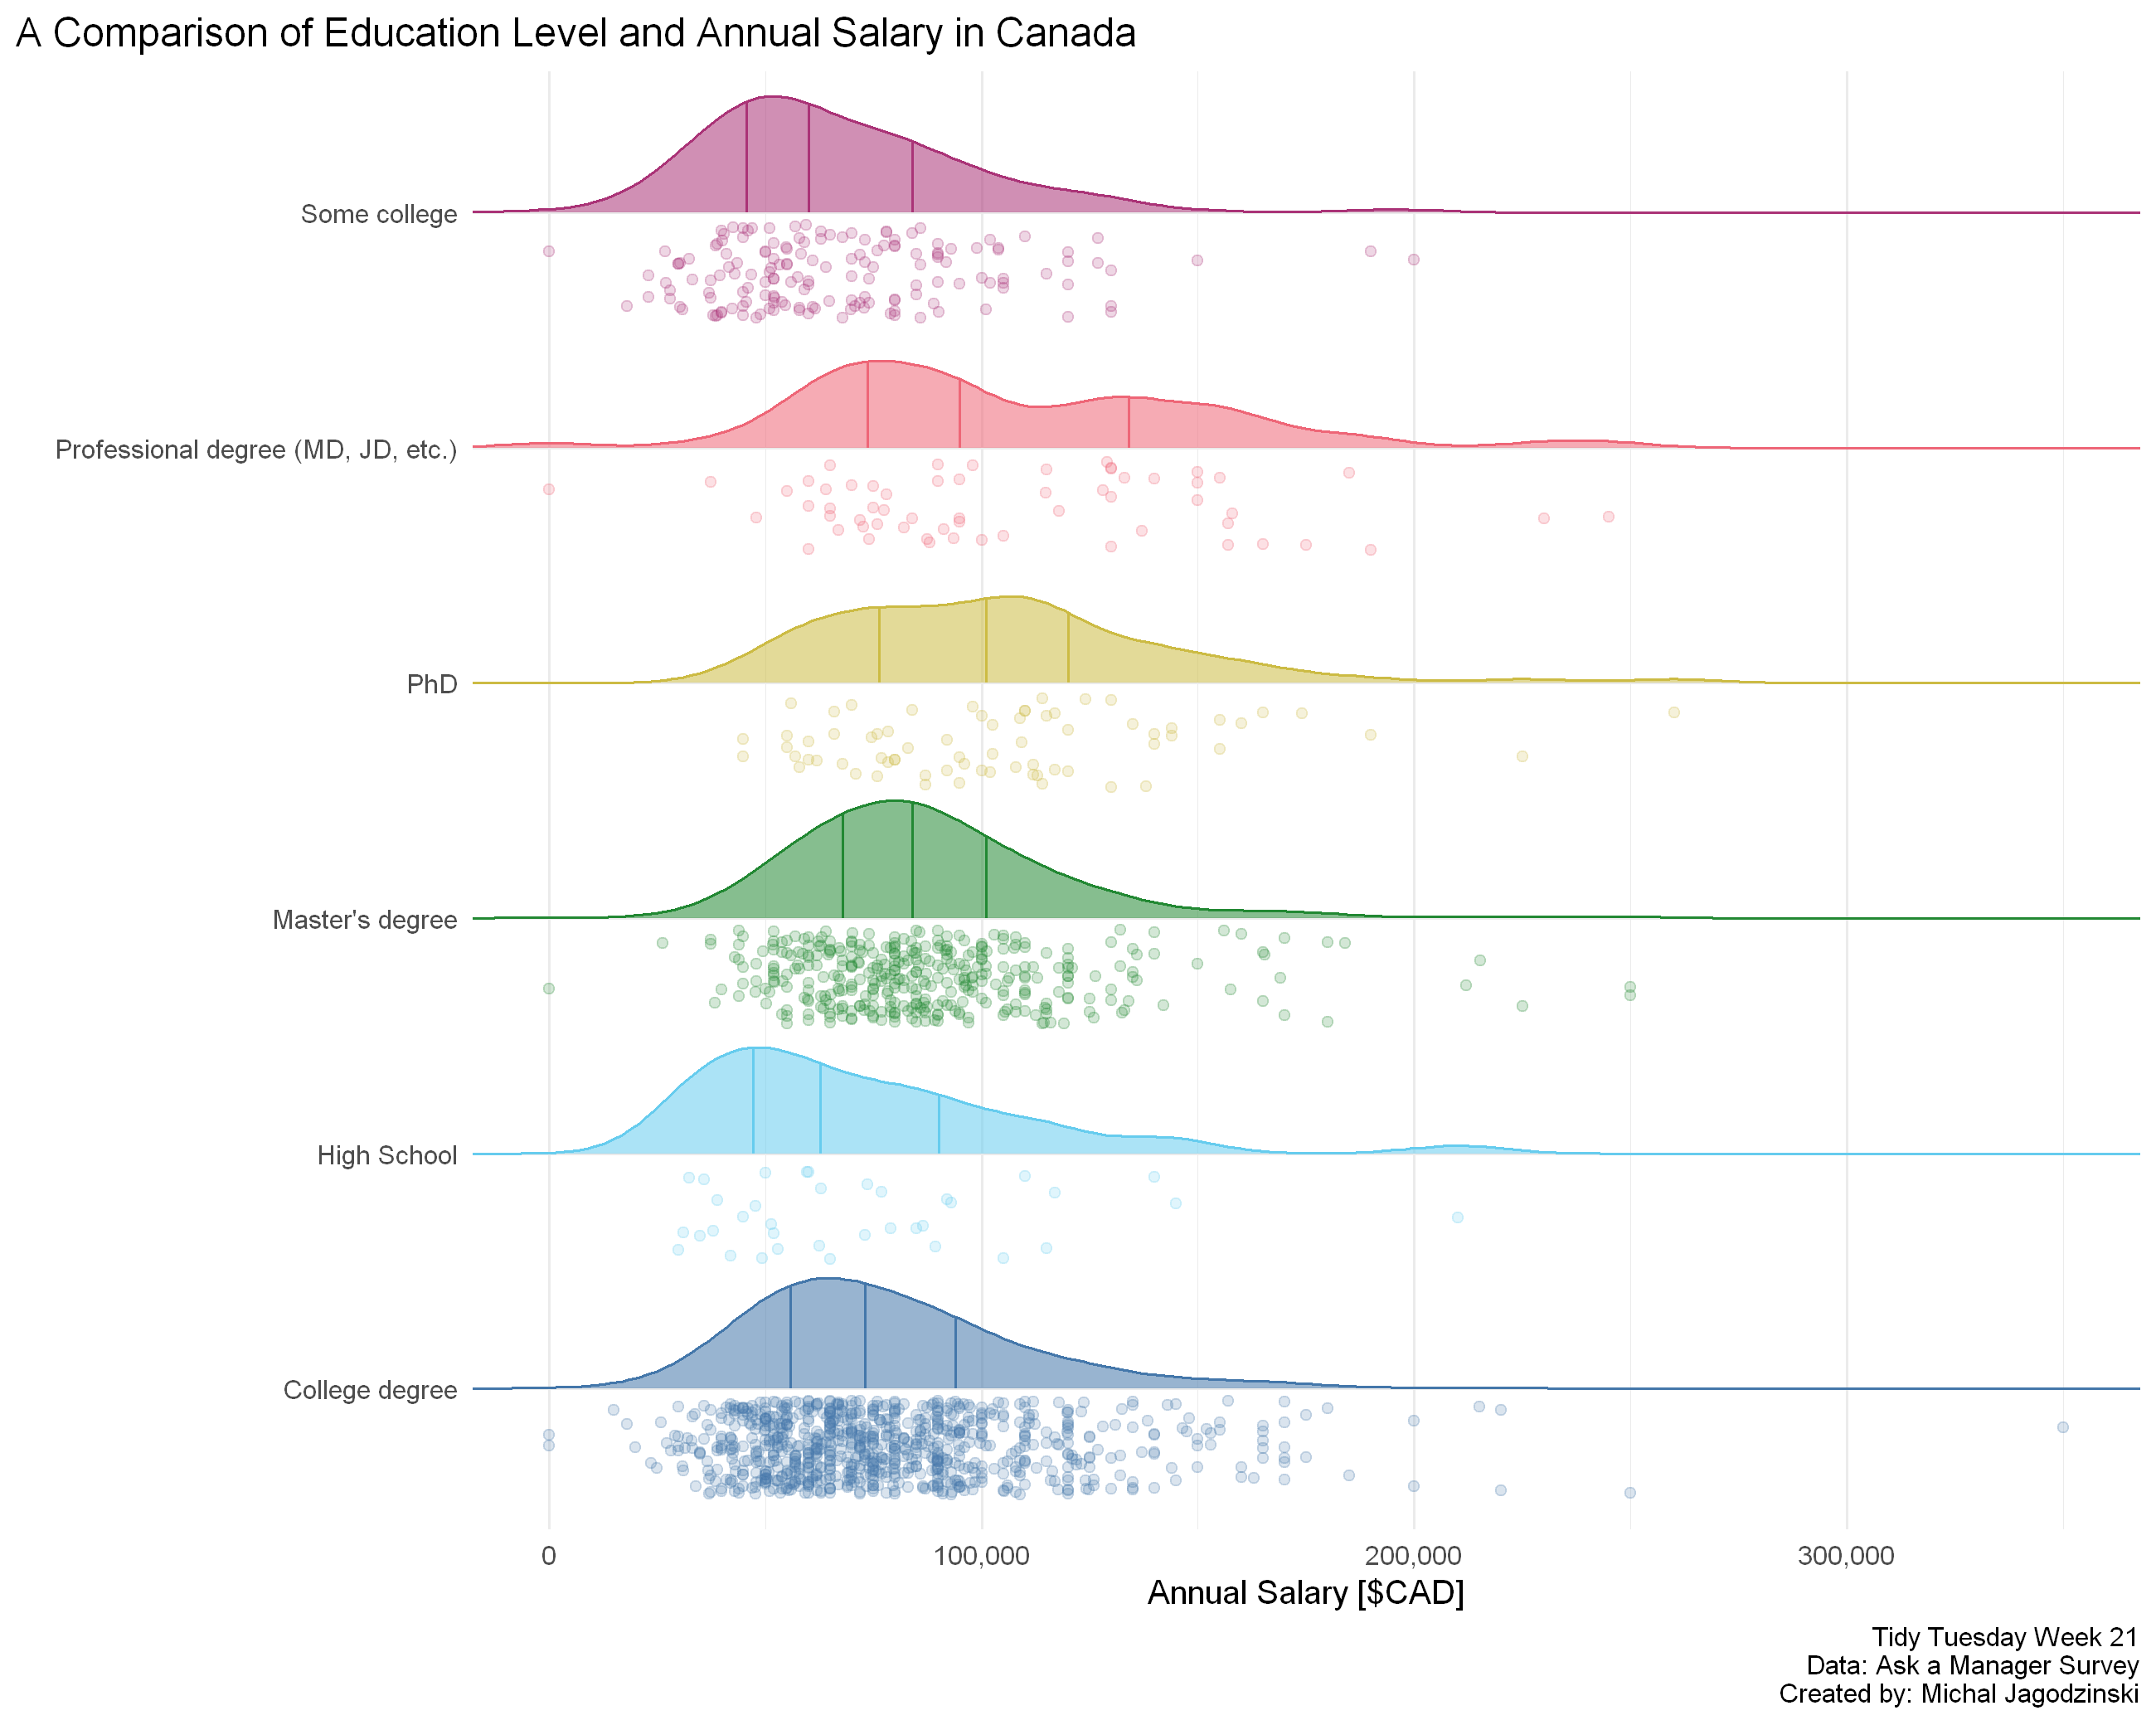

In [5]:
# colour blind friendly palette: https://personal.sron.nl/~pault/#sec:qualitative
colours = c("#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377")

options(repr.plot.res=260)
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(canada_data %>% filter(education != "NA"), 
       aes(x = annual_salary, 
           y = education, 
           fill = education,
           color = education,
           alpha = 0.5)) + 
    geom_density_ridges(aes(point_color = education),
                        scale = 0.5,
                        point_alpha = 0.2,
                        jittered_points = TRUE,
                        quantile_lines = TRUE, 
                        position = "raincloud", 
                        show.legend = FALSE) + 
    theme_minimal() + 
    labs(title = 'A Comparison of Education Level and Annual Salary in Canada',
         caption = 'Tidy Tuesday Week 21\nData: Ask a Manager Survey\nCreated by: Michal Jagodzinski',
         x = 'Annual Salary [$CAD]', 
         y = '') + 
    theme(plot.title.position = 'plot') + 
    coord_cartesian(xlim = c(0, 350000)) + 
    scale_x_continuous(labels = scales::comma) + 
    scale_discrete_manual(aesthetics = "point_color", values = colours) +
    scale_fill_manual(values = colours) + 
    scale_color_manual(values = colours)

Inverted geom defaults of fill and color/colour.
To change them back, use invert_geom_defaults().

Picking joint bandwidth of 11200



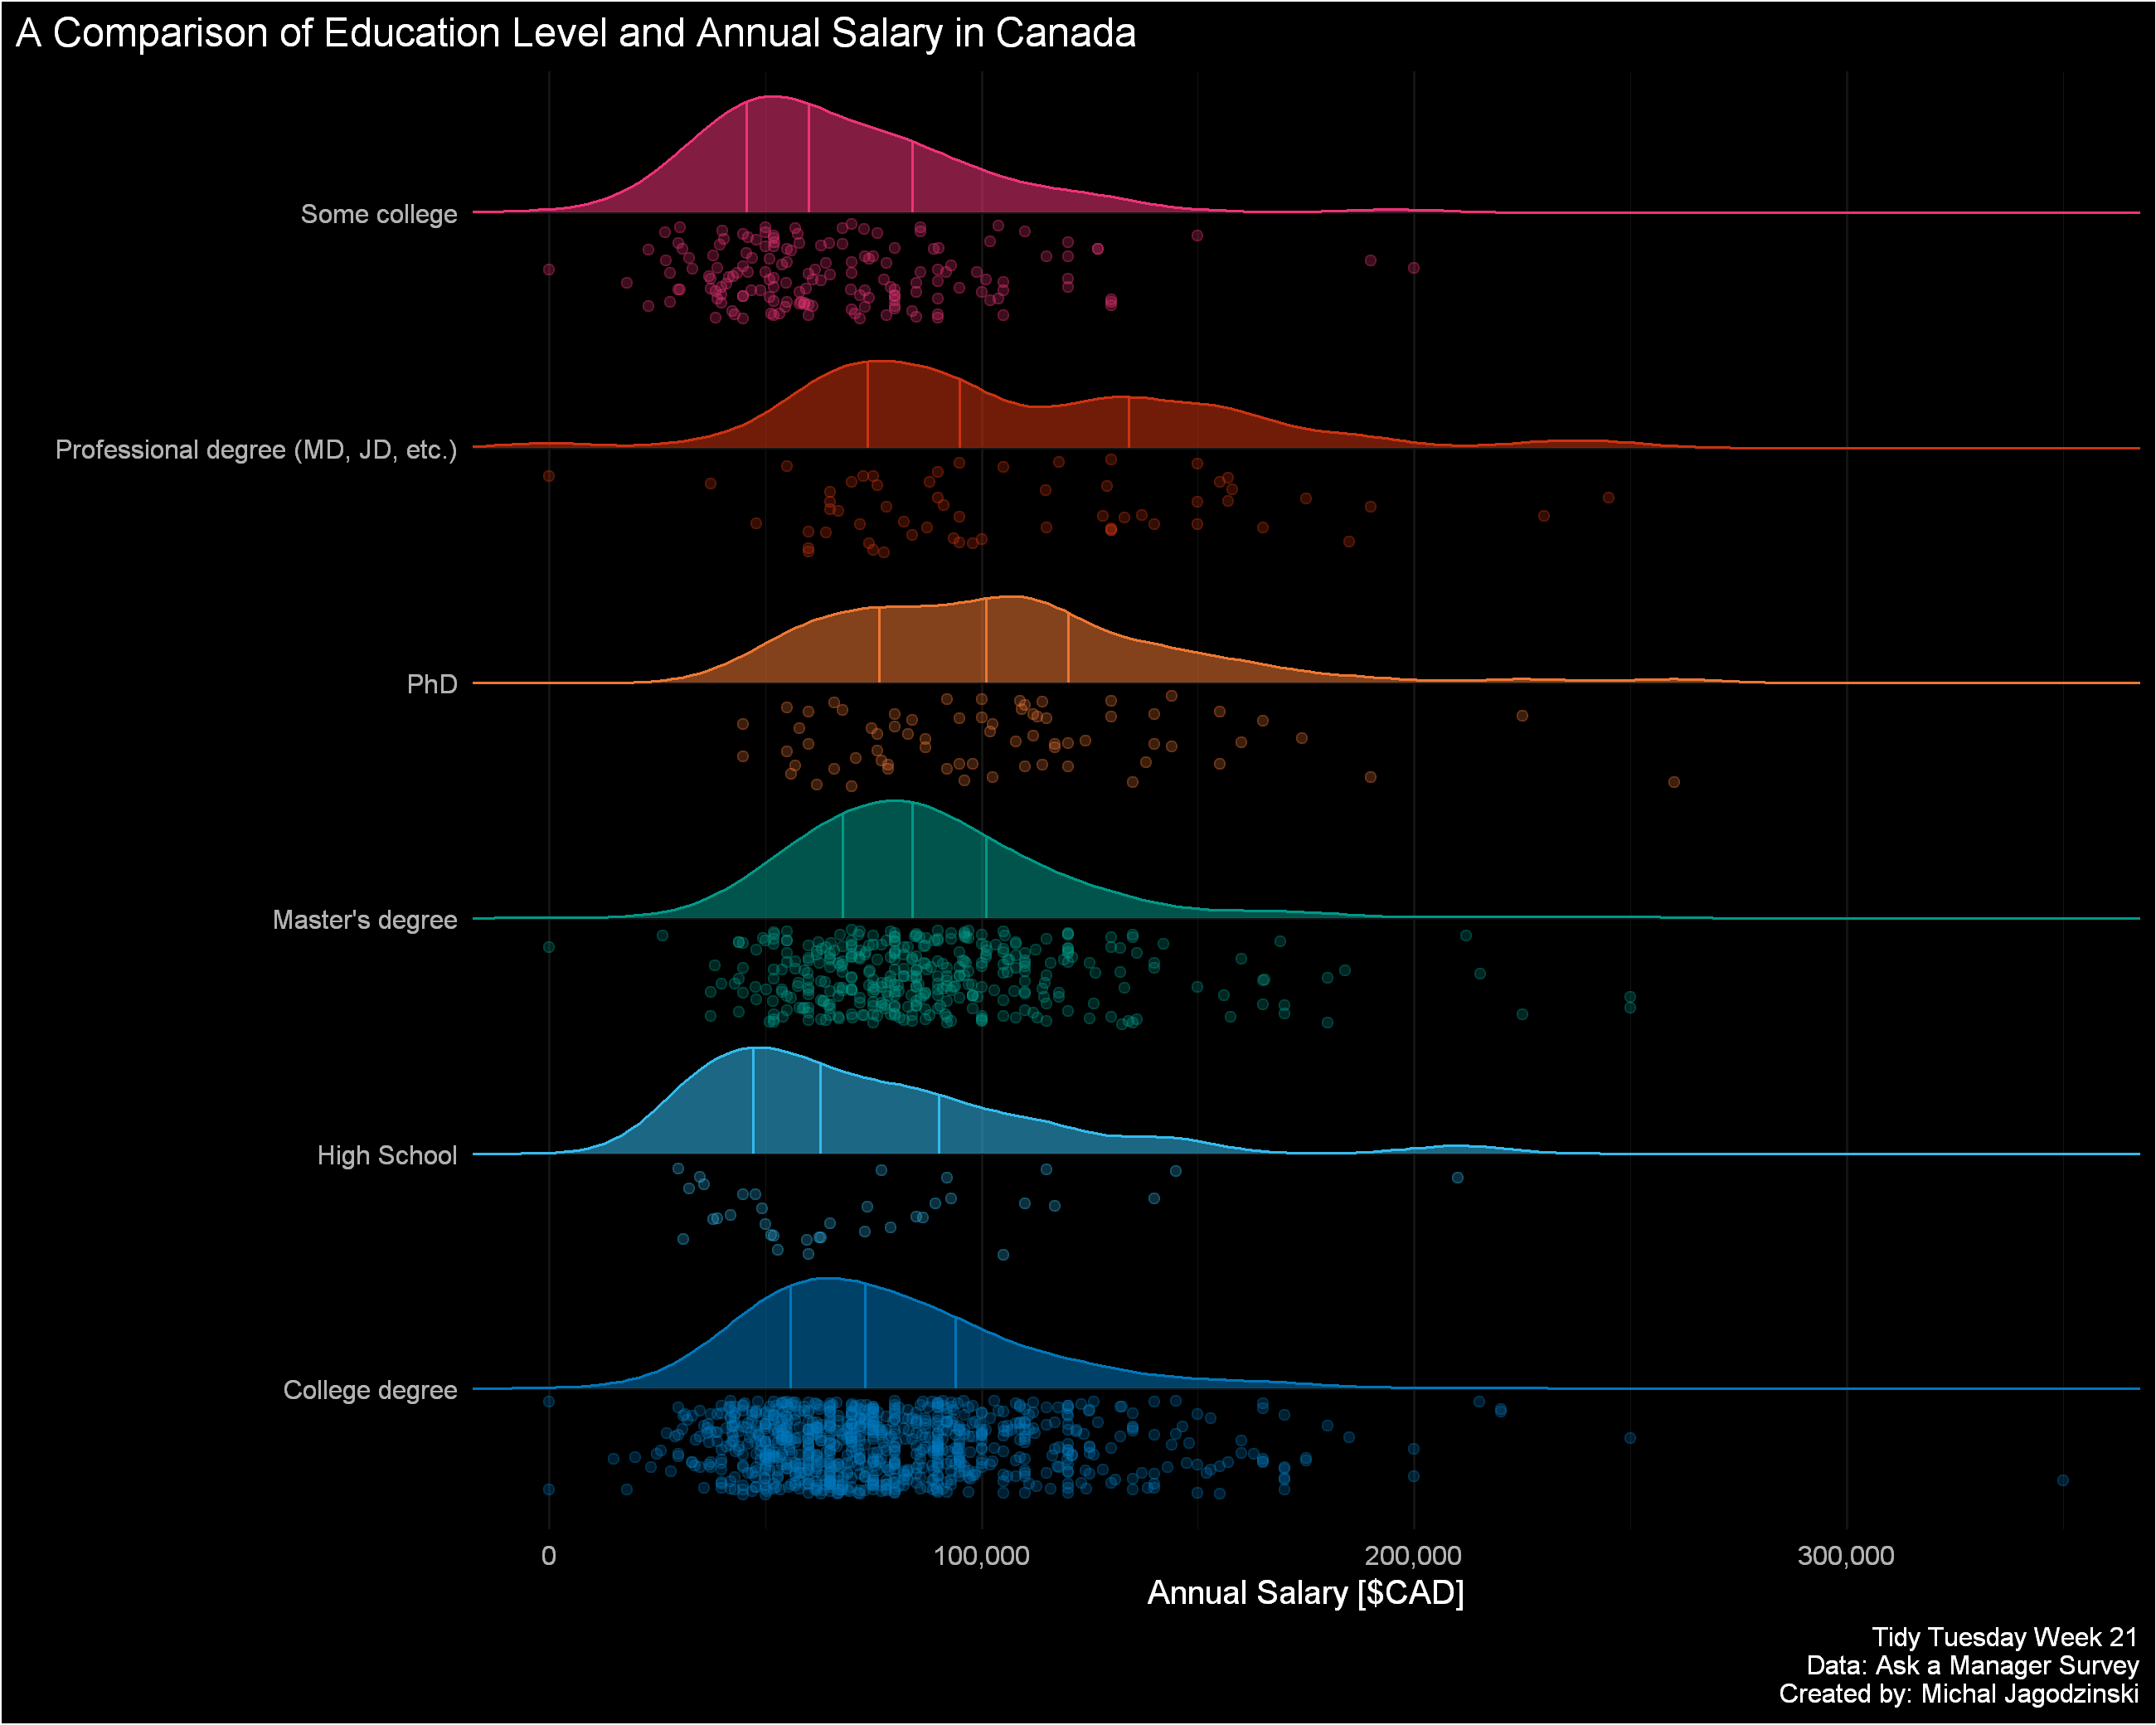

In [6]:
# colour blind friendly palette: https://personal.sron.nl/~pault/#sec:qualitative
dark_colours = c('#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377')

options(repr.plot.res=260)
options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(canada_data %>% filter(education != "NA"), 
       aes(x = annual_salary, 
           y = education, 
           fill = education, 
           color = education,
           alpha = 0.5)) + 
    geom_density_ridges(aes(point_color = education),
                        scale = 0.5,
                        point_alpha = 0.25,
                        jittered_points = TRUE,
                        quantile_lines = TRUE, 
                        position = "raincloud", 
                        show.legend = FALSE) + 
    dark_theme_minimal() + 
    labs(title = 'A Comparison of Education Level and Annual Salary in Canada',
         caption = 'Tidy Tuesday Week 21\nData: Ask a Manager Survey\nCreated by: Michal Jagodzinski',
         x = 'Annual Salary [$CAD]', 
         y = '') + 
    theme(plot.title.position = 'plot') + 
    coord_cartesian(xlim = c(0, 350000)) + 
    scale_x_continuous(labels = scales::comma) + 
    scale_discrete_manual(aesthetics = "point_color", values = dark_colours) +
    scale_fill_manual(values = dark_colours) + 
    scale_color_manual(values = dark_colours)

In [7]:
ggsave('week21.png', width = 10, height = 8, dpi = 300)

Picking joint bandwidth of 11200

